# Machine Learning Foundation

##  Classification

In [20]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.offline as py
py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

In [50]:
# Load data
##### Load train and Test set


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')

In [51]:
print(f' number of rows{train.shape[0] }; nomber of colmns {train.shape[1] }; no of  missing values{sum(train.isna().sum())} ')

 number of rows891; nomber of colmns 12; no of  missing values866 


In [52]:
print(f' number of rows :{test.shape[0]} ; number of colmns {test.shape[1] } ;no of missing values is {sum(test.isna().sum())}')

 number of rows :418 ; number of colmns 11 ;no of missing values is 414


In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [55]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

In [56]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

In [57]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

In [58]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
### Summarize data
# Summarie and statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
full_data = [train, test]
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in full_data:
   
    dataset['Embarked'] = dataset['Embarked'].replace('S', 1)
    dataset['Embarked'] = dataset['Embarked'].replace('C', 2)
    dataset['Embarked'] = dataset['Embarked'].replace('Q', 3)

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2


In [61]:
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
for dataset in full_data:

       
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
     # Mapping Age

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,1,"(7.91, 14.454]"


In [62]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger name
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
train.head(50)



# Group all non-common titles into one single grouping "Rare"  .........
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


for dataset in full_data:
  
 # Mapping titles   .................
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    



train = train.drop('Name', axis = 1)
test  = test.drop('Name', axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Title
0,1,0,3,male,22.0,1,0,A/5 21171,0,NaN,1,"(-0.001, 7.91]",1
1,2,1,1,female,38.0,1,0,PC 17599,3,C85,2,"(31.0, 512.329]",3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,1,NaN,1,"(7.91, 14.454]",2
3,4,1,1,female,35.0,1,0,113803,3,C123,1,"(31.0, 512.329]",3
4,5,0,3,male,35.0,0,0,373450,1,NaN,1,"(7.91, 14.454]",1


In [63]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in full_data:
   
    dataset['Embarked'] = dataset['Embarked'].replace('S', 1)
    dataset['Embarked'] = dataset['Embarked'].replace('C', 2)
    dataset['Embarked'] = dataset['Embarked'].replace('Q', 3)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Title
0,1,0,3,male,22.0,1,0,A/5 21171,0,NaN,1,"(-0.001, 7.91]",1
1,2,1,1,female,38.0,1,0,PC 17599,3,C85,2,"(31.0, 512.329]",3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,1,NaN,1,"(7.91, 14.454]",2
3,4,1,1,female,35.0,1,0,113803,3,C123,1,"(31.0, 512.329]",3
4,5,0,3,male,35.0,0,0,373450,1,NaN,1,"(7.91, 14.454]",1


In [64]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in full_data:
   
    dataset['Embarked'] = dataset['Embarked'].replace('S', 1)
    dataset['Embarked'] = dataset['Embarked'].replace('C', 2)
    dataset['Embarked'] = dataset['Embarked'].replace('Q', 3)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Title
0,1,0,3,male,22.0,1,0,A/5 21171,0,NaN,1,"(-0.001, 7.91]",1
1,2,1,1,female,38.0,1,0,PC 17599,3,C85,2,"(31.0, 512.329]",3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,1,NaN,1,"(7.91, 14.454]",2
3,4,1,1,female,35.0,1,0,113803,3,C123,1,"(31.0, 512.329]",3
4,5,0,3,male,35.0,0,0,373450,1,NaN,1,"(7.91, 14.454]",1


In [65]:
full_data = [train, test]
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# age
for dataset in full_data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    

for dataset in full_data: 

     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 

     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1 

     dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2 

     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3 

     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

# Create new feature FamilySize as a combination of SibSp and Parch

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train = train.drop(['SibSp','Parch'], axis = 1)
test  = test.drop(['SibSp','Parch'], axis = 1)



train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

#Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

train = train.drop('CategoricalFare', axis = 1)

train = train.drop('PassengerId', axis = 1)
test = test.drop('PassengerId', axis = 1)
 
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Has_Cabin
0,0,3,1,1,0,1,1,2,0
1,1,1,0,3,3,2,3,2,1
2,1,3,0,1,1,1,2,1,0
3,1,1,0,2,3,1,3,2,1
4,0,3,1,2,1,1,1,1,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

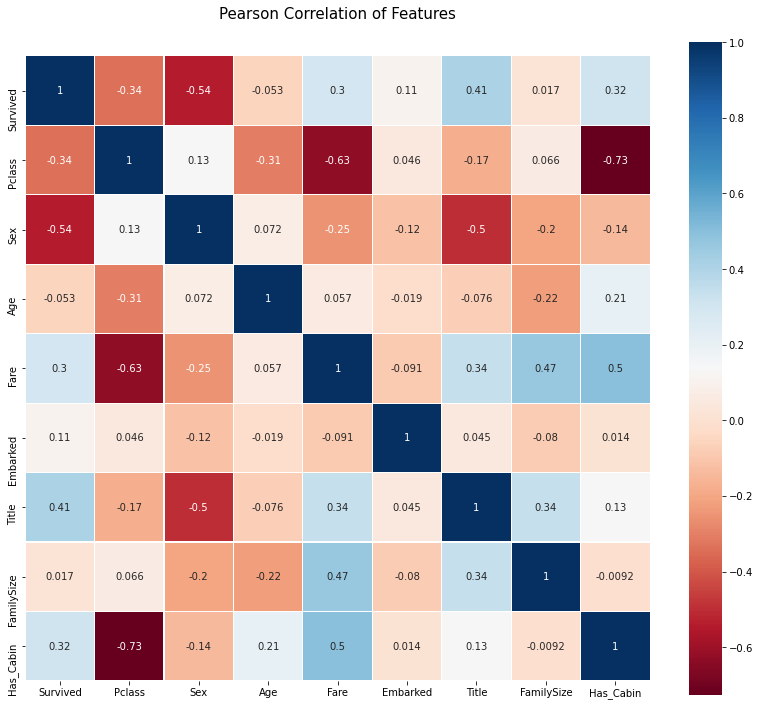

In [66]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [67]:
train.head().style.background_gradient(cmap="Blues")

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Has_Cabin
0,0,3,1,1,0,1,1,2,0
1,1,1,0,3,3,2,3,2,1
2,1,3,0,1,1,1,2,1,0
3,1,1,0,2,3,1,3,2,1
4,0,3,1,2,1,1,1,1,0


In [68]:
#Checking The Description Of Data¶
def colour_map(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = "black"
        
    return "color: %s" %color

In [69]:
train.describe().style.background_gradient(cmap="Blues")

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,1.689113,1.505051,1.361392,1.728395,1.904602,0.228956
std,0.486592,0.836071,0.477990,1.030373,1.118148,0.635673,1.030039,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,3.000000,5.000000,11.000000,1.000000


In [70]:
train.describe().style.background_gradient(cmap="Blues")

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,1.689113,1.505051,1.361392,1.728395,1.904602,0.228956
std,0.486592,0.836071,0.477990,1.030373,1.118148,0.635673,1.030039,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,3.000000,5.000000,11.000000,1.000000


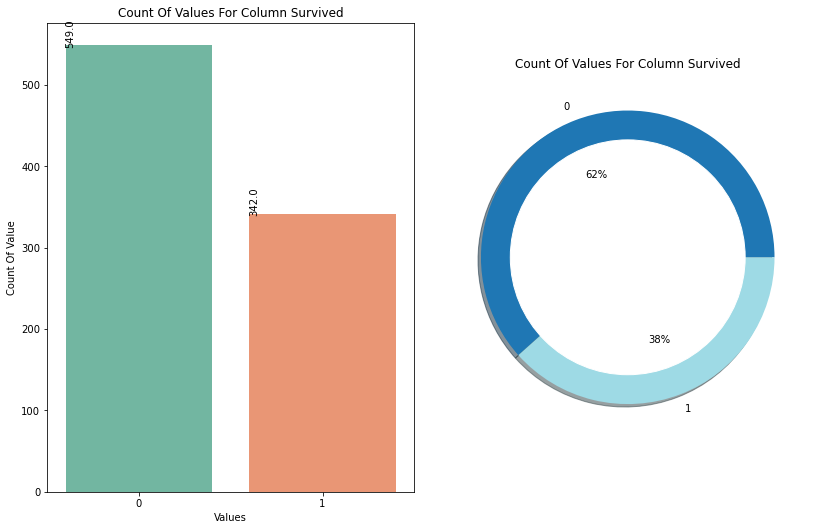

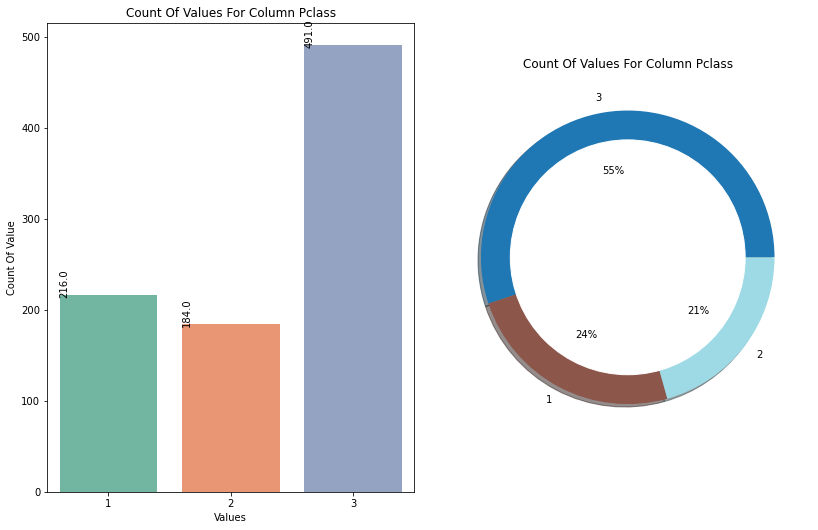

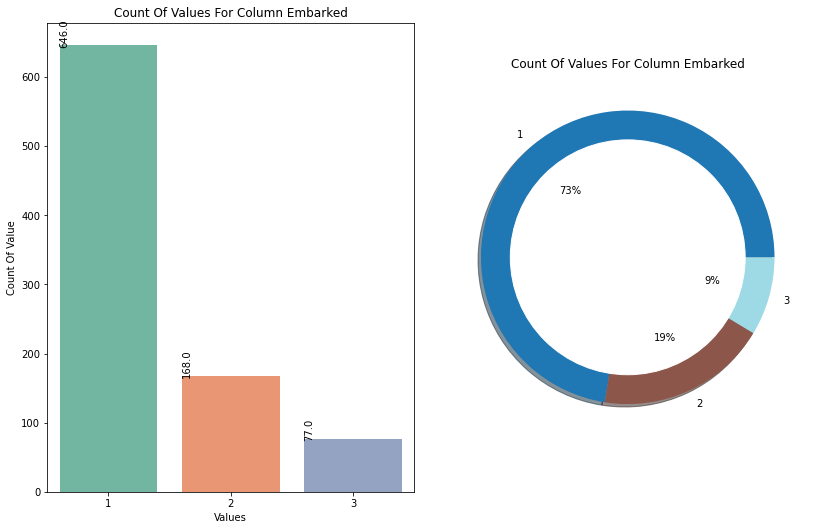

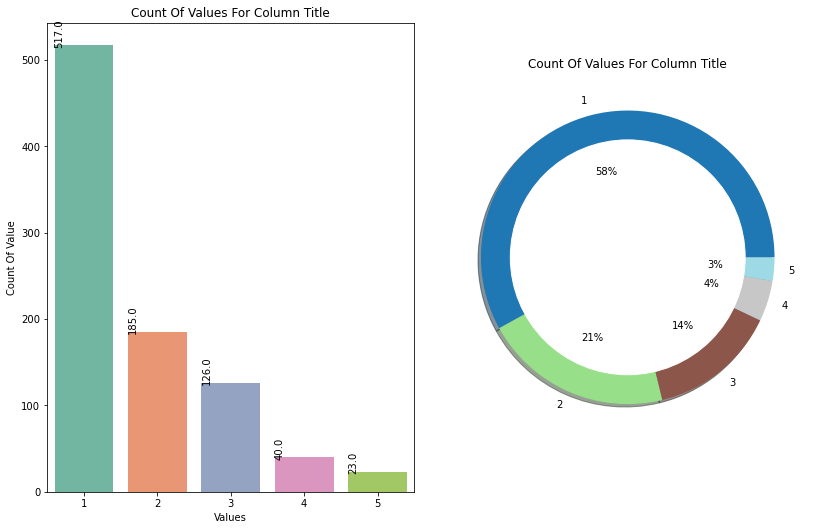

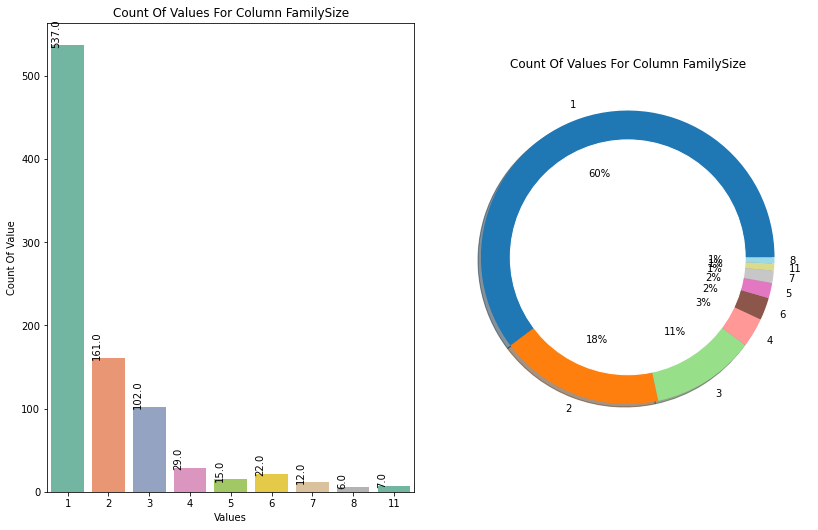

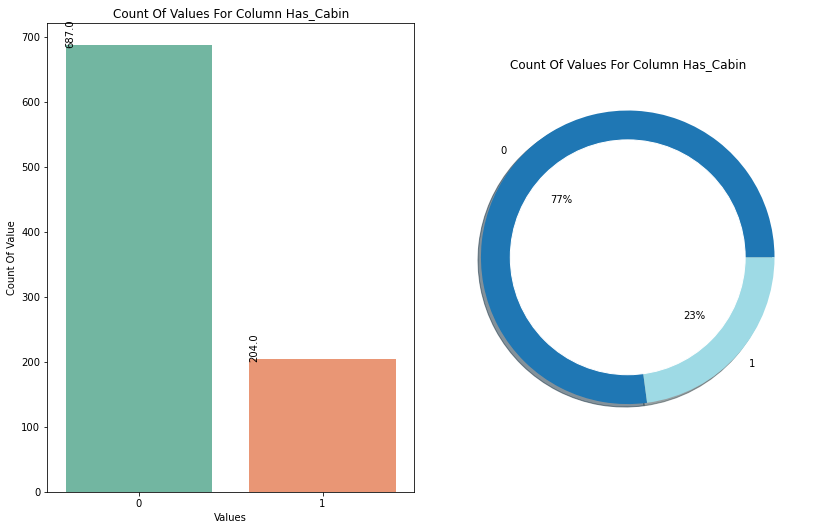

In [71]:
def feature_value_counts(df,dtype='int64'):
    # Select The Discrete Columns(acc to this data all int64s are discrete)
    cols = list(df.select_dtypes(dtype).columns)
    
    # Removing ID from columns
    if 'id' in cols:
        cols.remove('id')
    # Loop through each category
    for col in cols:
        # Create subplots
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
        
        # Create a value count plot
        plt1 = sns.countplot(df[col],ax=ax1,palette='Set2')
        # Set Title & Labels For First Plot
        ax1.set_title(f"Count Of Values For Column {col}")
        ax1.set_ylabel("Count Of Value")
        ax1.set_xlabel("Values")
        # annotate the barplot
        for p in plt1.patches:
            plt1.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),rotation=90)
        
        # Create a pie plot
        # Create a circle for donot plot
        circle = plt.Circle((0,0),.8,color='white')
        # Plot a pie plot
        df[col].value_counts().plot(kind='pie',ax=ax2,shadow=True,cmap='tab20',autopct="%1.0f%%")
        # Set Title & Labels For First Plot
        ax2.set_title(f"Count Of Values For Column {col}")
        ax2.set_ylabel("")
        # Add circle to plot
        ax2.add_artist(circle)
        
        plt.tight_layout(pad=3)
        plt.show()
feature_value_counts(train)

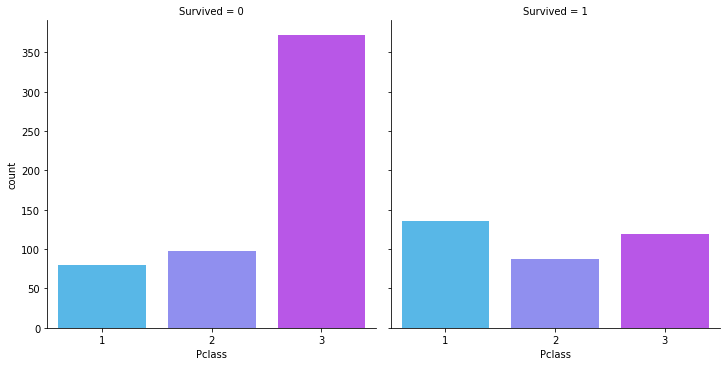

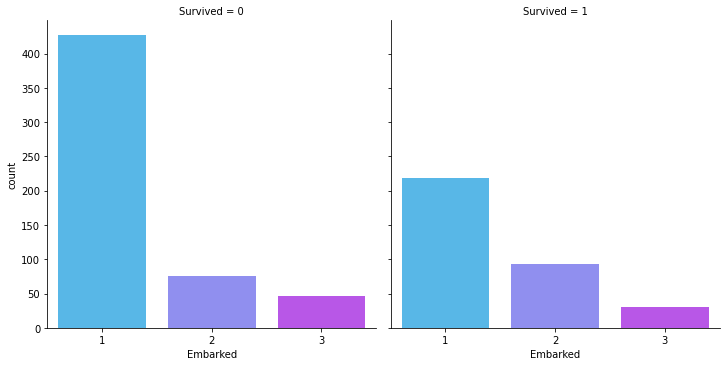

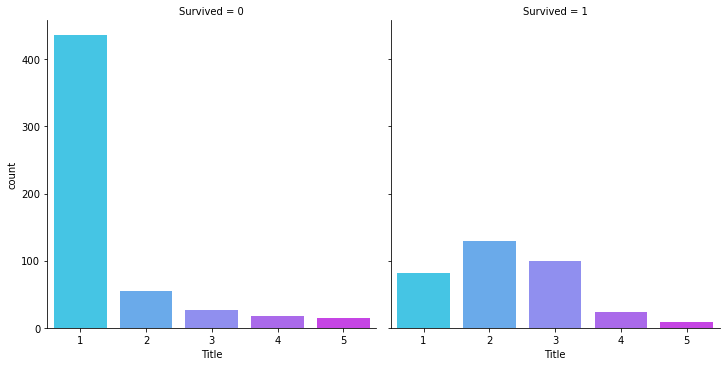

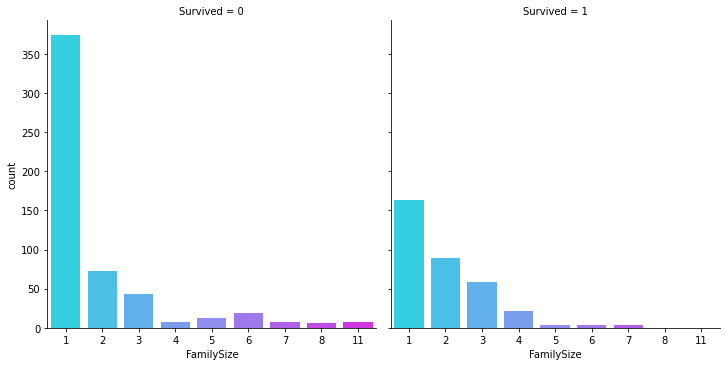

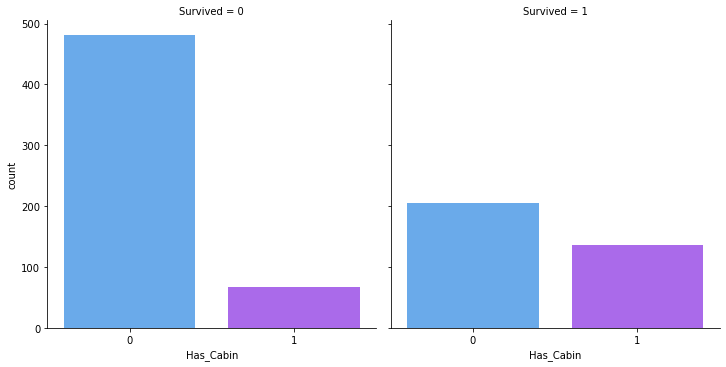

In [72]:
cols = train.select_dtypes('int64').columns

# Iterate Throught Each Column
for col in cols[1:]:
    # Plot a catplot
    sns.catplot(data=train,x=col,col='Survived',kind='count',palette='cool')
    plt.show()

In [44]:
#Models

In [73]:
y_train = train['Survived'].ravel() # creat an array  : targat

train = train.drop(['Survived'], axis=1) # :train_data
x_train = train.values # Creates an array of the train data
x_test = test.values 
y_test=y_test['Survived']

### Standard logistic regression

In [74]:

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [75]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train)

In [76]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(x_train, y_train)

In [48]:
#Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [77]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(test), name=lab))
   
    
y_pred = pd.concat(y_pred, axis=1)


y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1


In [78]:
y_pred.shape

(418, 3)

In [79]:
y_test.shape,test.shape

((418,), (418, 8))

In [80]:

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [81]:
metrics

,lr,l1,l2
precision,0.894737,0.900238,0.896584
recall,0.894737,0.899522,0.897129
fscore,0.894737,0.899793,0.896585
accuracy,0.894737,0.899522,0.897129
auc,0.886278,0.894267,0.883929


### Model KNN :K nearest neighbor 


In [82]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [83]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       266
           1       0.77      0.84      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.85      0.84       418
weighted avg       0.85      0.85      0.85       418

Accuracy score:  0.85
F1 Score:  0.8


Text(0.5, 87.0, 'Ground Truth')

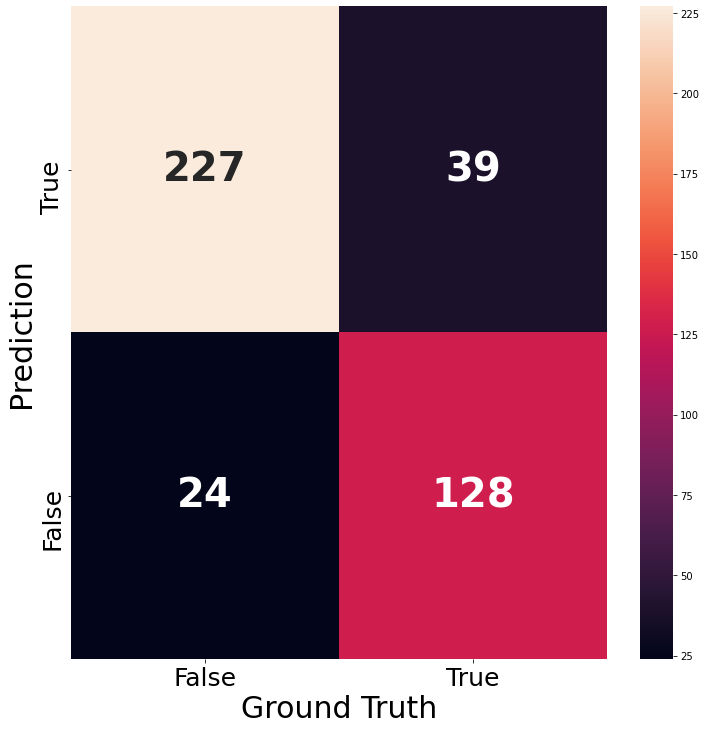

In [84]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [85]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       266
           1       0.75      0.80      0.78       152

    accuracy                           0.83       418
   macro avg       0.82      0.83      0.82       418
weighted avg       0.84      0.83      0.83       418

Accuracy score:  0.83
F1 Score:  0.78


Text(0.5, 87.0, 'Ground Truth')

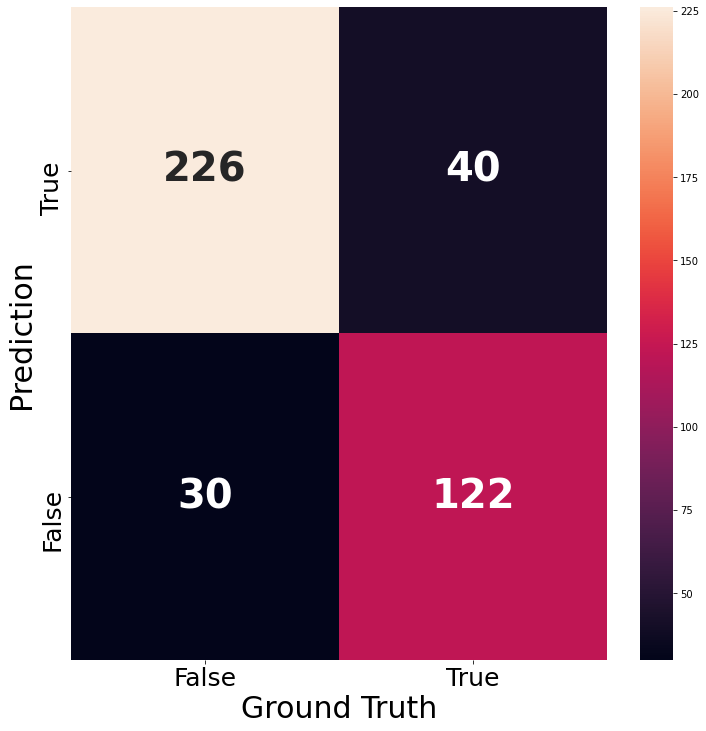

In [86]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [87]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_train, y_train)
    
    y_pred = knn.predict(test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

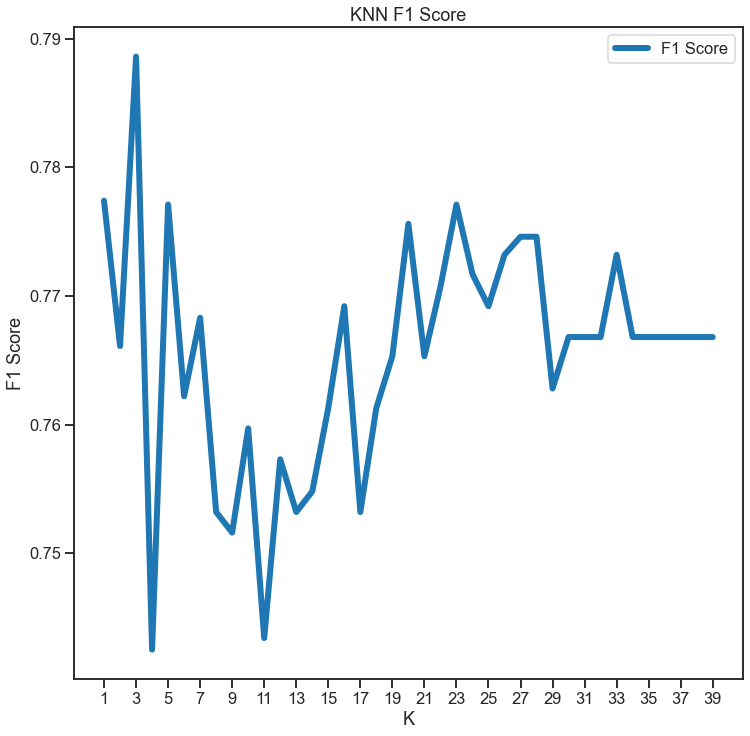

In [88]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

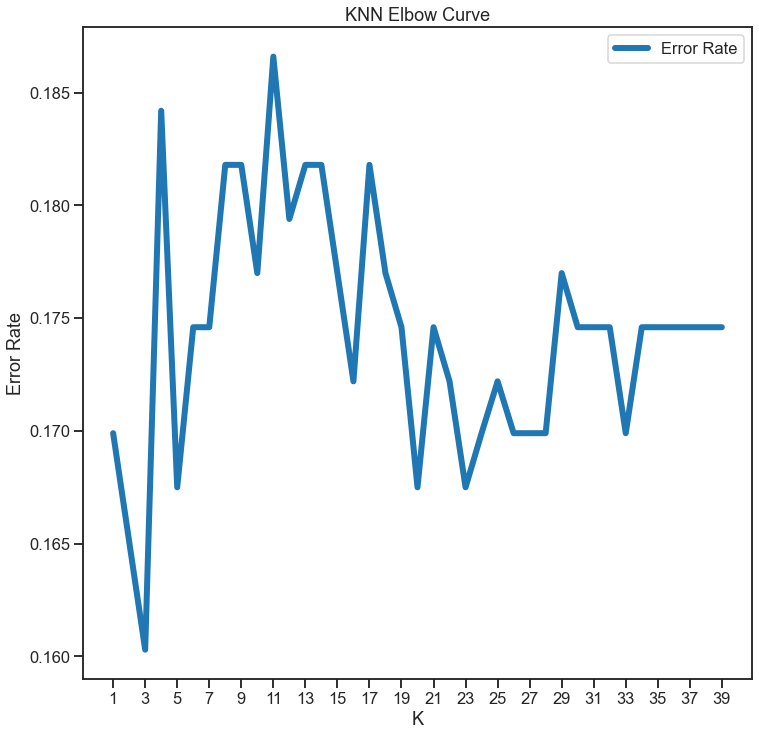

In [89]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')


###  Support Vector Machines 


In [91]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score



lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC()


In [92]:

lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

Score:  0.8092031425364759


In [93]:
cv_scores = cross_val_score(lsvc, x_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.81


In [94]:
ypred = lsvc.predict(test)

cm = confusion_matrix(y_test, ypred)
print(cm)


[[251  15]
 [ 13 139]]


In [95]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)

In [97]:
dt.tree_.node_count, dt.tree_.max_depth

(339, 15)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [99]:
# The error on the training and test data sets
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.900112,0.808612
precision,0.928814,0.727848
recall,0.801170,0.756579
f1,0.860283,0.741935


In [100]:

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)

In [101]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(15, 3)

In [102]:
y_train_pred_gr = GR.predict(x_train)
y_test_pred_gr = GR.predict(test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [103]:
train_test_gr_error


,train,test
accuracy,0.823793,0.937799
precision,0.781155,0.875000
recall,0.751462,0.967105
f1,0.766021,0.918750


In [104]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

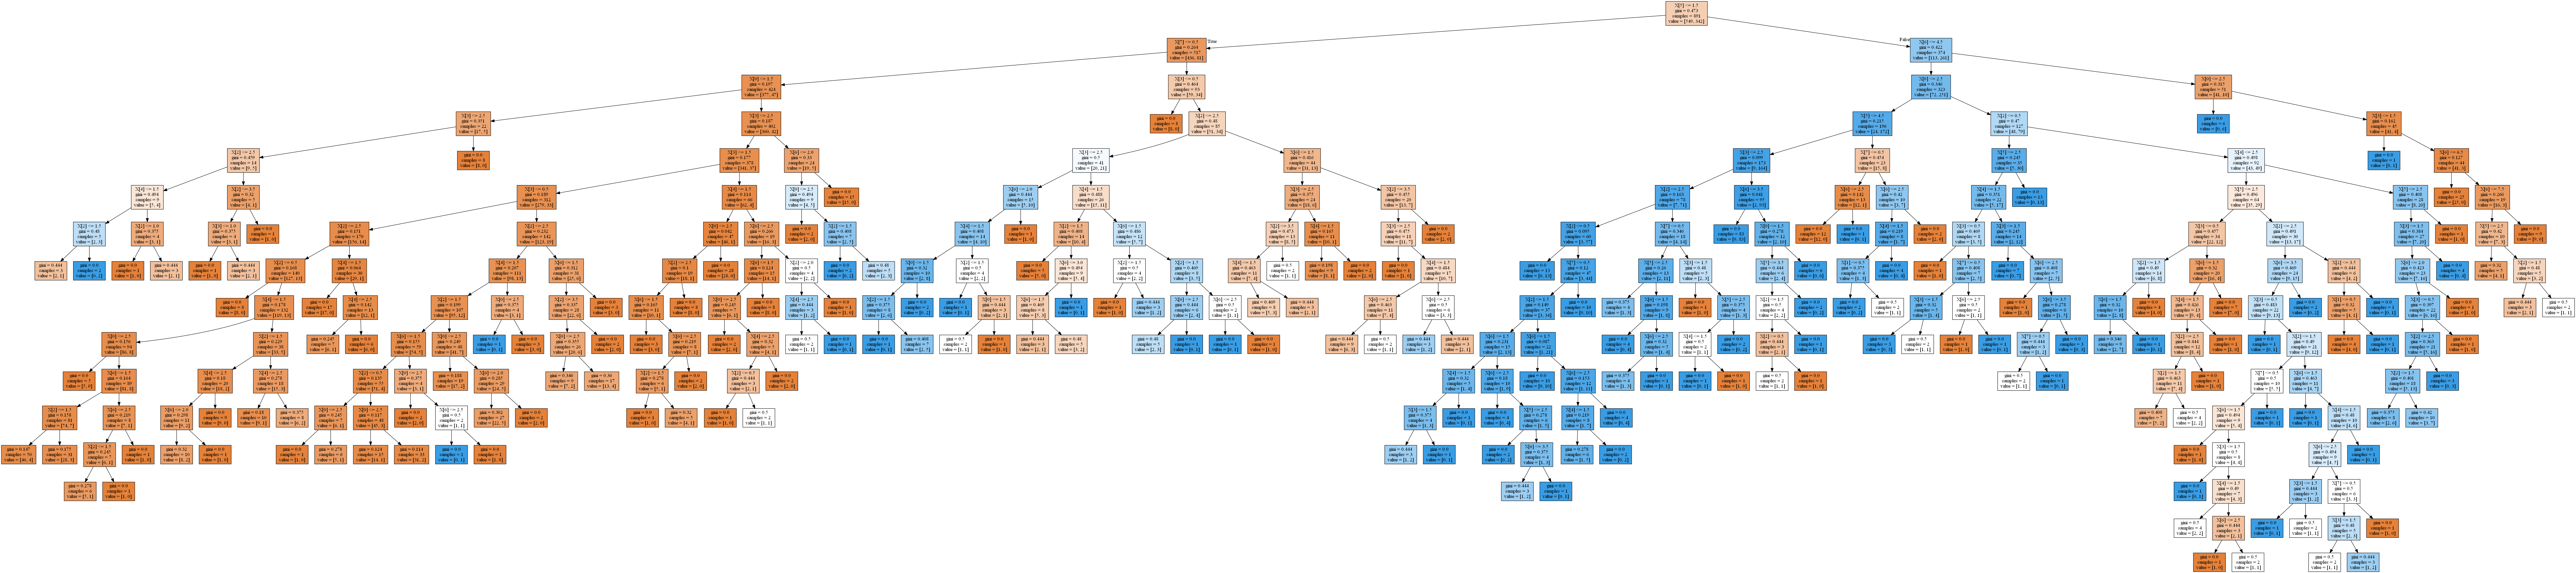

In [105]:

# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename)

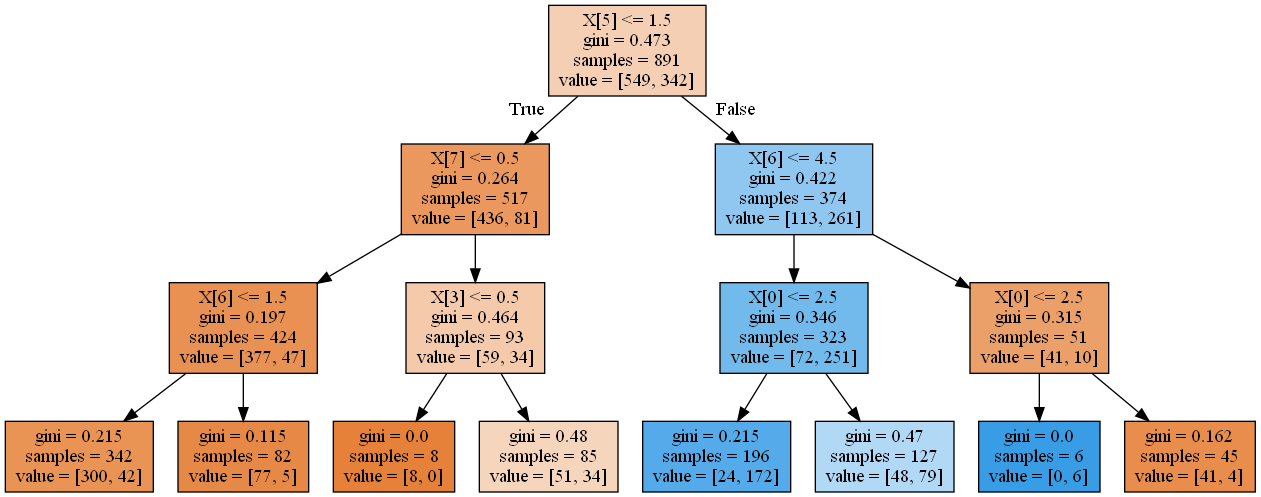

In [106]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 


### Random Forests 

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [108]:
n_estimators=20

In [109]:
M_features=x_train.shape[1]

In [110]:
max_features=round(np.sqrt(M_features))-1
max_features

2

In [111]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": accuracy_score(y_train, model.predict(X_train))}

In [112]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)

In [113]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=20, random_state=0)

In [114]:
print(get_accuracy(x_train, test, y_train, y_test, model))

{'test Accuracy': 0.8301435406698564, 'trian Accuracy': 0.898989898989899}


We use GridSearchCV to search over specified parameter values  of the model.


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [117]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}


In [118]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [119]:
search.best_score_

0.8349821103508883

In [120]:
search.best_params_


{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 31}

In [121]:
print(get_accuracy(x_train, test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.8349282296650717, 'trian Accuracy': 0.8810325476992144}


### ExtraTreesClassifier


In [122]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# define the model
model = ExtraTreesClassifier(n_estimators=100)
# fit the model on the whole dataset
model.fit(x_train, y_train)

ExtraTreesClassifier()

In [123]:
# make a prediction

y_preds_Extra = model.predict(test )

In [124]:
print(get_accuracy(x_train, test, y_train, y_test, model))

{'test Accuracy': 0.8110047846889952, 'trian Accuracy': 0.9001122334455668}


In [125]:
# calculate manually
def my_function(y,y_preds):
  
  d = y - y_preds
  mse_f = np.mean(d**2)
  mae_f = np.mean(abs(d))
  rmse_f = np.sqrt(mse_f)


  print("Results by manual calculation:")
  print("MAE:",mae_f)
  print("MSE:", mse_f)
  print("RMSE:", rmse_f)

In [126]:
print('randomforset model')
y_preds_Random = model.predict(test )
my_function(y_test,y_preds_Extra)

randomforset model
Results by manual calculation:
MAE: 0.18899521531100477
MSE: 0.18899521531100477
RMSE: 0.4347357994357087


### LightGBM GBDT

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X=x_train
y=y_train

In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((712, 8), (179, 8), (712,), (179,))

In [130]:
import lightgbm
from sklearn.metrics import roc_auc_score
#Step2: Create a simple Light GBM Model and evaluate performance
#LightGBM has function Dataset to read the data. This is required for using LightGBM
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

[1]	valid_0's auc: 0.772844
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.874582
[3]	valid_0's auc: 0.85547
[4]	valid_0's auc: 0.885521
[5]	valid_0's auc: 0.893115
[6]	valid_0's auc: 0.892021
[7]	valid_0's auc: 0.895367
[8]	valid_0's auc: 0.891634
[9]	valid_0's auc: 0.886873
[10]	valid_0's auc: 0.88816
[11]	valid_0's auc: 0.887259
[12]	valid_0's auc: 0.886486
[13]	valid_0's auc: 0.886036
[14]	valid_0's auc: 0.88758
[15]	valid_0's auc: 0.886937
[16]	valid_0's auc: 0.884492
[17]	valid_0's auc: 0.883333
[18]	valid_0's auc: 0.885907
[19]	valid_0's auc: 0.882561
[20]	valid_0's auc: 0.883977
[21]	valid_0's auc: 0.883977
[22]	valid_0's auc: 0.885135
[23]	valid_0's auc: 0.88462
[24]	valid_0's auc: 0.885264
[25]	valid_0's auc: 0.887452
[26]	valid_0's auc: 0.887967
[27]	valid_0's auc: 0.888739
[28]	valid_0's auc: 0.888095
[29]	valid_0's auc: 0.888546
[30]	valid_0's auc: 0.890862
[31]	valid_0's auc: 0.889447
[32]	valid_0's auc: 0.889575
[33]	valid_0's auc: 0.89

### LightGBM RF 

In [131]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'rf',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm_rf = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)
y_train_pred = model_lgbm_rf.predict(X_train)
y_valid_pred = model_lgbm_rf.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

[1]	valid_0's auc: 0.772844
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.871493
[3]	valid_0's auc: 0.855598
[4]	valid_0's auc: 0.886165
[5]	valid_0's auc: 0.891828
[6]	valid_0's auc: 0.891506
[7]	valid_0's auc: 0.893565
[8]	valid_0's auc: 0.890476
[9]	valid_0's auc: 0.885457
[10]	valid_0's auc: 0.887645
[11]	valid_0's auc: 0.8861
[12]	valid_0's auc: 0.885843
[13]	valid_0's auc: 0.884556
[14]	valid_0's auc: 0.885843
[15]	valid_0's auc: 0.885714
[16]	valid_0's auc: 0.883076
[17]	valid_0's auc: 0.881403
[18]	valid_0's auc: 0.883719
[19]	valid_0's auc: 0.880502
[20]	valid_0's auc: 0.881532
[21]	valid_0's auc: 0.88269
[22]	valid_0's auc: 0.882819
[23]	valid_0's auc: 0.881403
[24]	valid_0's auc: 0.88269
[25]	valid_0's auc: 0.885393
[26]	valid_0's auc: 0.886036
[27]	valid_0's auc: 0.88668
[28]	valid_0's auc: 0.890026
[29]	valid_0's auc: 0.887773
[30]	valid_0's auc: 0.888932
[31]	valid_0's auc: 0.888417
[32]	valid_0's auc: 0.889704
[33]	valid_0's auc: 0.890

### LightGBM dart

In [132]:
import lightgbm
from sklearn.metrics import roc_auc_score
#Step2: Create a simple Light GBM Model and evaluate performance
#LightGBM has function Dataset to read the data. This is required for using LightGBM
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'dart',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm_dart = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)
y_train_pred = model_lgbm_dart.predict(X_train)
y_valid_pred =model_lgbm_dart.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

[1]	valid_0's auc: 0.772844
[2]	valid_0's auc: 0.874582
[3]	valid_0's auc: 0.85547
[4]	valid_0's auc: 0.885521
[5]	valid_0's auc: 0.893115
[6]	valid_0's auc: 0.892021
[7]	valid_0's auc: 0.895367
[8]	valid_0's auc: 0.891248
[9]	valid_0's auc: 0.884041
[10]	valid_0's auc: 0.885843
[11]	valid_0's auc: 0.886615
[12]	valid_0's auc: 0.885843
[13]	valid_0's auc: 0.884942
[14]	valid_0's auc: 0.886615
[15]	valid_0's auc: 0.887773
[16]	valid_0's auc: 0.884942
[17]	valid_0's auc: 0.881081
[18]	valid_0's auc: 0.883848
[19]	valid_0's auc: 0.881918
[20]	valid_0's auc: 0.883977
[21]	valid_0's auc: 0.884234
[22]	valid_0's auc: 0.883848
[23]	valid_0's auc: 0.883462
[24]	valid_0's auc: 0.884363
[25]	valid_0's auc: 0.887709
[26]	valid_0's auc: 0.887838
[27]	valid_0's auc: 0.888739
[28]	valid_0's auc: 0.888867
[29]	valid_0's auc: 0.888803
[30]	valid_0's auc: 0.888031
[31]	valid_0's auc: 0.889189
[32]	valid_0's auc: 0.889189
[33]	valid_0's auc: 0.890219
[34]	valid_0's auc: 0.890219
[35]	valid_0's auc: 0.88

[289]	valid_0's auc: 0.895045
[290]	valid_0's auc: 0.894916
[291]	valid_0's auc: 0.89556
[292]	valid_0's auc: 0.895431
[293]	valid_0's auc: 0.895431
[294]	valid_0's auc: 0.894788
[295]	valid_0's auc: 0.894659
[296]	valid_0's auc: 0.895045
[297]	valid_0's auc: 0.894916
[298]	valid_0's auc: 0.89453
[299]	valid_0's auc: 0.894015
[300]	valid_0's auc: 0.894144
[301]	valid_0's auc: 0.894144
[302]	valid_0's auc: 0.894015
[303]	valid_0's auc: 0.894144
[304]	valid_0's auc: 0.894144
[305]	valid_0's auc: 0.894273
[306]	valid_0's auc: 0.894273
[307]	valid_0's auc: 0.894015
[308]	valid_0's auc: 0.894015
[309]	valid_0's auc: 0.894144
[310]	valid_0's auc: 0.894273
[311]	valid_0's auc: 0.89453
[312]	valid_0's auc: 0.894402
[313]	valid_0's auc: 0.894144
[314]	valid_0's auc: 0.894144
[315]	valid_0's auc: 0.894144
[316]	valid_0's auc: 0.894402
[317]	valid_0's auc: 0.894402
[318]	valid_0's auc: 0.89556
[319]	valid_0's auc: 0.89556
[320]	valid_0's auc: 0.895431
[321]	valid_0's auc: 0.895045
[322]	valid_0's

[589]	valid_0's auc: 0.895946
[590]	valid_0's auc: 0.895946
[591]	valid_0's auc: 0.895946
[592]	valid_0's auc: 0.895946
[593]	valid_0's auc: 0.896332
[594]	valid_0's auc: 0.896332
[595]	valid_0's auc: 0.896203
[596]	valid_0's auc: 0.896461
[597]	valid_0's auc: 0.896589
[598]	valid_0's auc: 0.896461
[599]	valid_0's auc: 0.896461
[600]	valid_0's auc: 0.896589
[601]	valid_0's auc: 0.896461
[602]	valid_0's auc: 0.896461
[603]	valid_0's auc: 0.896718
[604]	valid_0's auc: 0.896847
[605]	valid_0's auc: 0.896718
[606]	valid_0's auc: 0.896718
[607]	valid_0's auc: 0.896718
[608]	valid_0's auc: 0.896461
[609]	valid_0's auc: 0.896332
[610]	valid_0's auc: 0.896332
[611]	valid_0's auc: 0.895431
[612]	valid_0's auc: 0.895689
[613]	valid_0's auc: 0.89556
[614]	valid_0's auc: 0.895689
[615]	valid_0's auc: 0.89556
[616]	valid_0's auc: 0.895946
[617]	valid_0's auc: 0.895946
[618]	valid_0's auc: 0.89556
[619]	valid_0's auc: 0.89556
[620]	valid_0's auc: 0.89556
[621]	valid_0's auc: 0.89556
[622]	valid_0's 

[918]	valid_0's auc: 0.893629
[919]	valid_0's auc: 0.893629
[920]	valid_0's auc: 0.893629
[921]	valid_0's auc: 0.893629
[922]	valid_0's auc: 0.893629
[923]	valid_0's auc: 0.893629
[924]	valid_0's auc: 0.893501
[925]	valid_0's auc: 0.893501
[926]	valid_0's auc: 0.893501
[927]	valid_0's auc: 0.893501
[928]	valid_0's auc: 0.893501
[929]	valid_0's auc: 0.893629
[930]	valid_0's auc: 0.893501
[931]	valid_0's auc: 0.893629
[932]	valid_0's auc: 0.893629
[933]	valid_0's auc: 0.893243
[934]	valid_0's auc: 0.893758
[935]	valid_0's auc: 0.893501
[936]	valid_0's auc: 0.893629
[937]	valid_0's auc: 0.893501
[938]	valid_0's auc: 0.893629
[939]	valid_0's auc: 0.893629
[940]	valid_0's auc: 0.893629
[941]	valid_0's auc: 0.893629
[942]	valid_0's auc: 0.893758
[943]	valid_0's auc: 0.893758
[944]	valid_0's auc: 0.893758
[945]	valid_0's auc: 0.893758
[946]	valid_0's auc: 0.893758
[947]	valid_0's auc: 0.893629
[948]	valid_0's auc: 0.893629
[949]	valid_0's auc: 0.893372
[950]	valid_0's auc: 0.893629
[951]	vali

[1262]	valid_0's auc: 0.892214
[1263]	valid_0's auc: 0.8926
[1264]	valid_0's auc: 0.8926
[1265]	valid_0's auc: 0.8926
[1266]	valid_0's auc: 0.8926
[1267]	valid_0's auc: 0.8926
[1268]	valid_0's auc: 0.892728
[1269]	valid_0's auc: 0.892728
[1270]	valid_0's auc: 0.892857
[1271]	valid_0's auc: 0.892728
[1272]	valid_0's auc: 0.892728
[1273]	valid_0's auc: 0.892728
[1274]	valid_0's auc: 0.892728
[1275]	valid_0's auc: 0.8926
[1276]	valid_0's auc: 0.8926
[1277]	valid_0's auc: 0.8926
[1278]	valid_0's auc: 0.893115
[1279]	valid_0's auc: 0.893115
[1280]	valid_0's auc: 0.893115
[1281]	valid_0's auc: 0.893243
[1282]	valid_0's auc: 0.893243
[1283]	valid_0's auc: 0.892857
[1284]	valid_0's auc: 0.892857
[1285]	valid_0's auc: 0.893115
[1286]	valid_0's auc: 0.893115
[1287]	valid_0's auc: 0.893115
[1288]	valid_0's auc: 0.893115
[1289]	valid_0's auc: 0.893115
[1290]	valid_0's auc: 0.893115
[1291]	valid_0's auc: 0.893243
[1292]	valid_0's auc: 0.892986
[1293]	valid_0's auc: 0.892986
[1294]	valid_0's auc: 0.

[1593]	valid_0's auc: 0.895174
[1594]	valid_0's auc: 0.895302
[1595]	valid_0's auc: 0.895431
[1596]	valid_0's auc: 0.89556
[1597]	valid_0's auc: 0.89556
[1598]	valid_0's auc: 0.895689
[1599]	valid_0's auc: 0.895817
[1600]	valid_0's auc: 0.895946
[1601]	valid_0's auc: 0.895817
[1602]	valid_0's auc: 0.896203
[1603]	valid_0's auc: 0.896203
[1604]	valid_0's auc: 0.896203
[1605]	valid_0's auc: 0.896203
[1606]	valid_0's auc: 0.895302
[1607]	valid_0's auc: 0.895689
[1608]	valid_0's auc: 0.895817
[1609]	valid_0's auc: 0.895689
[1610]	valid_0's auc: 0.895689
[1611]	valid_0's auc: 0.895689
[1612]	valid_0's auc: 0.895689
[1613]	valid_0's auc: 0.895689
[1614]	valid_0's auc: 0.895302
[1615]	valid_0's auc: 0.895302
[1616]	valid_0's auc: 0.895302
[1617]	valid_0's auc: 0.895302
[1618]	valid_0's auc: 0.895302
[1619]	valid_0's auc: 0.895302
[1620]	valid_0's auc: 0.895431
[1621]	valid_0's auc: 0.895302
[1622]	valid_0's auc: 0.89556
[1623]	valid_0's auc: 0.895302
[1624]	valid_0's auc: 0.89556
[1625]	valid

[1919]	valid_0's auc: 0.896332
[1920]	valid_0's auc: 0.896332
[1921]	valid_0's auc: 0.896332
[1922]	valid_0's auc: 0.89556
[1923]	valid_0's auc: 0.896461
[1924]	valid_0's auc: 0.896461
[1925]	valid_0's auc: 0.896461
[1926]	valid_0's auc: 0.89556
[1927]	valid_0's auc: 0.89556
[1928]	valid_0's auc: 0.895174
[1929]	valid_0's auc: 0.89556
[1930]	valid_0's auc: 0.895689
[1931]	valid_0's auc: 0.895689
[1932]	valid_0's auc: 0.895689
[1933]	valid_0's auc: 0.895689
[1934]	valid_0's auc: 0.89556
[1935]	valid_0's auc: 0.89556
[1936]	valid_0's auc: 0.895302
[1937]	valid_0's auc: 0.895302
[1938]	valid_0's auc: 0.895174
[1939]	valid_0's auc: 0.895045
[1940]	valid_0's auc: 0.894916
[1941]	valid_0's auc: 0.894916
[1942]	valid_0's auc: 0.894916
[1943]	valid_0's auc: 0.894916
[1944]	valid_0's auc: 0.895045
[1945]	valid_0's auc: 0.894916
[1946]	valid_0's auc: 0.894916
[1947]	valid_0's auc: 0.894916
[1948]	valid_0's auc: 0.894916
[1949]	valid_0's auc: 0.895174
[1950]	valid_0's auc: 0.895174
[1951]	valid_0

[2269]	valid_0's auc: 0.894788
[2270]	valid_0's auc: 0.895302
[2271]	valid_0's auc: 0.895302
[2272]	valid_0's auc: 0.895302
[2273]	valid_0's auc: 0.895302
[2274]	valid_0's auc: 0.895045
[2275]	valid_0's auc: 0.895689
[2276]	valid_0's auc: 0.895689
[2277]	valid_0's auc: 0.895689
[2278]	valid_0's auc: 0.895689
[2279]	valid_0's auc: 0.89556
[2280]	valid_0's auc: 0.89556
[2281]	valid_0's auc: 0.89556
[2282]	valid_0's auc: 0.89556
[2283]	valid_0's auc: 0.895431
[2284]	valid_0's auc: 0.893629
[2285]	valid_0's auc: 0.893629
[2286]	valid_0's auc: 0.893372
[2287]	valid_0's auc: 0.893501
[2288]	valid_0's auc: 0.893501
[2289]	valid_0's auc: 0.893501
[2290]	valid_0's auc: 0.893501
[2291]	valid_0's auc: 0.893501
[2292]	valid_0's auc: 0.893501
[2293]	valid_0's auc: 0.893887
[2294]	valid_0's auc: 0.894144
[2295]	valid_0's auc: 0.894015
[2296]	valid_0's auc: 0.894015
[2297]	valid_0's auc: 0.894015
[2298]	valid_0's auc: 0.894015
[2299]	valid_0's auc: 0.893629
[2300]	valid_0's auc: 0.894015
[2301]	valid

[2537]	valid_0's auc: 0.893501
[2538]	valid_0's auc: 0.893501
[2539]	valid_0's auc: 0.894788
[2540]	valid_0's auc: 0.894788
[2541]	valid_0's auc: 0.894788
[2542]	valid_0's auc: 0.894015
[2543]	valid_0's auc: 0.894015
[2544]	valid_0's auc: 0.894015
[2545]	valid_0's auc: 0.894015
[2546]	valid_0's auc: 0.894015
[2547]	valid_0's auc: 0.894015
[2548]	valid_0's auc: 0.894015
[2549]	valid_0's auc: 0.894015
[2550]	valid_0's auc: 0.894015
[2551]	valid_0's auc: 0.894015
[2552]	valid_0's auc: 0.894144
[2553]	valid_0's auc: 0.893758
[2554]	valid_0's auc: 0.893758
[2555]	valid_0's auc: 0.893758
[2556]	valid_0's auc: 0.893629
[2557]	valid_0's auc: 0.893629
[2558]	valid_0's auc: 0.893629
[2559]	valid_0's auc: 0.893629
[2560]	valid_0's auc: 0.893629
[2561]	valid_0's auc: 0.893887
[2562]	valid_0's auc: 0.893887
[2563]	valid_0's auc: 0.893887
[2564]	valid_0's auc: 0.893887
[2565]	valid_0's auc: 0.893887
[2566]	valid_0's auc: 0.893887
[2567]	valid_0's auc: 0.893887
[2568]	valid_0's auc: 0.894144
[2569]	v

[2871]	valid_0's auc: 0.889382
[2872]	valid_0's auc: 0.888867
[2873]	valid_0's auc: 0.888867
[2874]	valid_0's auc: 0.888867
[2875]	valid_0's auc: 0.888867
[2876]	valid_0's auc: 0.888867
[2877]	valid_0's auc: 0.888867
[2878]	valid_0's auc: 0.888867
[2879]	valid_0's auc: 0.888739
[2880]	valid_0's auc: 0.888739
[2881]	valid_0's auc: 0.888867
[2882]	valid_0's auc: 0.888996
[2883]	valid_0's auc: 0.888996
[2884]	valid_0's auc: 0.888996
[2885]	valid_0's auc: 0.889125
[2886]	valid_0's auc: 0.889125
[2887]	valid_0's auc: 0.889125
[2888]	valid_0's auc: 0.889125
[2889]	valid_0's auc: 0.889125
[2890]	valid_0's auc: 0.889511
[2891]	valid_0's auc: 0.889382
[2892]	valid_0's auc: 0.889254
[2893]	valid_0's auc: 0.889897
[2894]	valid_0's auc: 0.889897
[2895]	valid_0's auc: 0.889897
[2896]	valid_0's auc: 0.890026
[2897]	valid_0's auc: 0.890026
[2898]	valid_0's auc: 0.890026
[2899]	valid_0's auc: 0.890412
[2900]	valid_0's auc: 0.8926
[2901]	valid_0's auc: 0.892728
[2902]	valid_0's auc: 0.892857
[2903]	val

[3141]	valid_0's auc: 0.891313
[3142]	valid_0's auc: 0.891313
[3143]	valid_0's auc: 0.891313
[3144]	valid_0's auc: 0.891313
[3145]	valid_0's auc: 0.891699
[3146]	valid_0's auc: 0.891699
[3147]	valid_0's auc: 0.891184
[3148]	valid_0's auc: 0.890283
[3149]	valid_0's auc: 0.890154
[3150]	valid_0's auc: 0.890283
[3151]	valid_0's auc: 0.890283
[3152]	valid_0's auc: 0.890283
[3153]	valid_0's auc: 0.890541
[3154]	valid_0's auc: 0.890541
[3155]	valid_0's auc: 0.890798
[3156]	valid_0's auc: 0.890669
[3157]	valid_0's auc: 0.890412
[3158]	valid_0's auc: 0.890412
[3159]	valid_0's auc: 0.890412
[3160]	valid_0's auc: 0.890412
[3161]	valid_0's auc: 0.890669
[3162]	valid_0's auc: 0.890669
[3163]	valid_0's auc: 0.890669
[3164]	valid_0's auc: 0.890541
[3165]	valid_0's auc: 0.890541
[3166]	valid_0's auc: 0.890541
[3167]	valid_0's auc: 0.890541
[3168]	valid_0's auc: 0.890541
[3169]	valid_0's auc: 0.890541
[3170]	valid_0's auc: 0.890541
[3171]	valid_0's auc: 0.890669
[3172]	valid_0's auc: 0.890412
[3173]	v

[3420]	valid_0's auc: 0.889382
[3421]	valid_0's auc: 0.889511
[3422]	valid_0's auc: 0.889511
[3423]	valid_0's auc: 0.889254
[3424]	valid_0's auc: 0.889254
[3425]	valid_0's auc: 0.889254
[3426]	valid_0's auc: 0.889254
[3427]	valid_0's auc: 0.889254
[3428]	valid_0's auc: 0.889511
[3429]	valid_0's auc: 0.889511
[3430]	valid_0's auc: 0.889511
[3431]	valid_0's auc: 0.889511
[3432]	valid_0's auc: 0.889511
[3433]	valid_0's auc: 0.889511
[3434]	valid_0's auc: 0.889511
[3435]	valid_0's auc: 0.889382
[3436]	valid_0's auc: 0.889382
[3437]	valid_0's auc: 0.889382
[3438]	valid_0's auc: 0.889382
[3439]	valid_0's auc: 0.889511
[3440]	valid_0's auc: 0.889511
[3441]	valid_0's auc: 0.889382
[3442]	valid_0's auc: 0.889382
[3443]	valid_0's auc: 0.889382
[3444]	valid_0's auc: 0.889382
[3445]	valid_0's auc: 0.889382
[3446]	valid_0's auc: 0.889254
[3447]	valid_0's auc: 0.889254
[3448]	valid_0's auc: 0.889254
[3449]	valid_0's auc: 0.889254
[3450]	valid_0's auc: 0.889254
[3451]	valid_0's auc: 0.889254
[3452]	v

[3751]	valid_0's auc: 0.888481
[3752]	valid_0's auc: 0.888353
[3753]	valid_0's auc: 0.888353
[3754]	valid_0's auc: 0.888353
[3755]	valid_0's auc: 0.888353
[3756]	valid_0's auc: 0.888996
[3757]	valid_0's auc: 0.889125
[3758]	valid_0's auc: 0.889125
[3759]	valid_0's auc: 0.889125
[3760]	valid_0's auc: 0.889125
[3761]	valid_0's auc: 0.889125
[3762]	valid_0's auc: 0.890026
[3763]	valid_0's auc: 0.890154
[3764]	valid_0's auc: 0.890026
[3765]	valid_0's auc: 0.890412
[3766]	valid_0's auc: 0.890412
[3767]	valid_0's auc: 0.890412
[3768]	valid_0's auc: 0.890412
[3769]	valid_0's auc: 0.890412
[3770]	valid_0's auc: 0.890412
[3771]	valid_0's auc: 0.890412
[3772]	valid_0's auc: 0.890412
[3773]	valid_0's auc: 0.890412
[3774]	valid_0's auc: 0.890283
[3775]	valid_0's auc: 0.890283
[3776]	valid_0's auc: 0.890283
[3777]	valid_0's auc: 0.890154
[3778]	valid_0's auc: 0.890154
[3779]	valid_0's auc: 0.890412
[3780]	valid_0's auc: 0.889511
[3781]	valid_0's auc: 0.889897
[3782]	valid_0's auc: 0.889511
[3783]	v

[4021]	valid_0's auc: 0.890669
[4022]	valid_0's auc: 0.890798
[4023]	valid_0's auc: 0.890541
[4024]	valid_0's auc: 0.890798
[4025]	valid_0's auc: 0.890669
[4026]	valid_0's auc: 0.890669
[4027]	valid_0's auc: 0.890412
[4028]	valid_0's auc: 0.890541
[4029]	valid_0's auc: 0.890412
[4030]	valid_0's auc: 0.890283
[4031]	valid_0's auc: 0.890283
[4032]	valid_0's auc: 0.890283
[4033]	valid_0's auc: 0.890283
[4034]	valid_0's auc: 0.890026
[4035]	valid_0's auc: 0.890026
[4036]	valid_0's auc: 0.890026
[4037]	valid_0's auc: 0.890026
[4038]	valid_0's auc: 0.890026
[4039]	valid_0's auc: 0.890026
[4040]	valid_0's auc: 0.890026
[4041]	valid_0's auc: 0.890026
[4042]	valid_0's auc: 0.890026
[4043]	valid_0's auc: 0.890026
[4044]	valid_0's auc: 0.890283
[4045]	valid_0's auc: 0.890283
[4046]	valid_0's auc: 0.890541
[4047]	valid_0's auc: 0.890541
[4048]	valid_0's auc: 0.890798
[4049]	valid_0's auc: 0.890798
[4050]	valid_0's auc: 0.890798
[4051]	valid_0's auc: 0.890798
[4052]	valid_0's auc: 0.891699
[4053]	v

[4367]	valid_0's auc: 0.891699
[4368]	valid_0's auc: 0.891828
[4369]	valid_0's auc: 0.891828
[4370]	valid_0's auc: 0.891828
[4371]	valid_0's auc: 0.891699
[4372]	valid_0's auc: 0.891699
[4373]	valid_0's auc: 0.891699
[4374]	valid_0's auc: 0.891699
[4375]	valid_0's auc: 0.891699
[4376]	valid_0's auc: 0.891828
[4377]	valid_0's auc: 0.891699
[4378]	valid_0's auc: 0.891699
[4379]	valid_0's auc: 0.892214
[4380]	valid_0's auc: 0.8926
[4381]	valid_0's auc: 0.8926
[4382]	valid_0's auc: 0.892857
[4383]	valid_0's auc: 0.892857
[4384]	valid_0's auc: 0.892857
[4385]	valid_0's auc: 0.892857
[4386]	valid_0's auc: 0.893115
[4387]	valid_0's auc: 0.893629
[4388]	valid_0's auc: 0.893629
[4389]	valid_0's auc: 0.893629
[4390]	valid_0's auc: 0.893629
[4391]	valid_0's auc: 0.893629
[4392]	valid_0's auc: 0.894144
[4393]	valid_0's auc: 0.894144
[4394]	valid_0's auc: 0.894144
[4395]	valid_0's auc: 0.894144
[4396]	valid_0's auc: 0.894144
[4397]	valid_0's auc: 0.894144
[4398]	valid_0's auc: 0.894144
[4399]	valid

[4692]	valid_0's auc: 0.890412
[4693]	valid_0's auc: 0.890412
[4694]	valid_0's auc: 0.890412
[4695]	valid_0's auc: 0.890541
[4696]	valid_0's auc: 0.890669
[4697]	valid_0's auc: 0.890541
[4698]	valid_0's auc: 0.890541
[4699]	valid_0's auc: 0.890541
[4700]	valid_0's auc: 0.890541
[4701]	valid_0's auc: 0.890541
[4702]	valid_0's auc: 0.890541
[4703]	valid_0's auc: 0.890541
[4704]	valid_0's auc: 0.890541
[4705]	valid_0's auc: 0.890669
[4706]	valid_0's auc: 0.890541
[4707]	valid_0's auc: 0.890669
[4708]	valid_0's auc: 0.88964
[4709]	valid_0's auc: 0.889768
[4710]	valid_0's auc: 0.889768
[4711]	valid_0's auc: 0.88964
[4712]	valid_0's auc: 0.889125
[4713]	valid_0's auc: 0.889125
[4714]	valid_0's auc: 0.889125
[4715]	valid_0's auc: 0.889125
[4716]	valid_0's auc: 0.889125
[4717]	valid_0's auc: 0.889254
[4718]	valid_0's auc: 0.889254
[4719]	valid_0's auc: 0.888996
[4720]	valid_0's auc: 0.888996
[4721]	valid_0's auc: 0.888996
[4722]	valid_0's auc: 0.888996
[4723]	valid_0's auc: 0.888996
[4724]	val

[4967]	valid_0's auc: 0.889382
[4968]	valid_0's auc: 0.889511
[4969]	valid_0's auc: 0.889897
[4970]	valid_0's auc: 0.890026
[4971]	valid_0's auc: 0.890026
[4972]	valid_0's auc: 0.890026
[4973]	valid_0's auc: 0.889768
[4974]	valid_0's auc: 0.889768
[4975]	valid_0's auc: 0.889897
[4976]	valid_0's auc: 0.889897
[4977]	valid_0's auc: 0.890026
[4978]	valid_0's auc: 0.889897
[4979]	valid_0's auc: 0.889897
[4980]	valid_0's auc: 0.889897
[4981]	valid_0's auc: 0.889768
[4982]	valid_0's auc: 0.889768
[4983]	valid_0's auc: 0.889768
[4984]	valid_0's auc: 0.890026
[4985]	valid_0's auc: 0.890026
[4986]	valid_0's auc: 0.889511
[4987]	valid_0's auc: 0.890283
[4988]	valid_0's auc: 0.890154
[4989]	valid_0's auc: 0.889768
[4990]	valid_0's auc: 0.890026
[4991]	valid_0's auc: 0.890026
[4992]	valid_0's auc: 0.890026
[4993]	valid_0's auc: 0.890026
[4994]	valid_0's auc: 0.889897
[4995]	valid_0's auc: 0.889897
[4996]	valid_0's auc: 0.889897
[4997]	valid_0's auc: 0.889768
[4998]	valid_0's auc: 0.889897
[4999]	v